In [15]:
import seaborn as sns
data=sns.load_dataset("tips")
print(data.shape[0])
(data.head())

244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
import seaborn as sns
import pandas as pd
# Generate synthetic data
df=sns.load_dataset('taxis')
df.head()
#print(df.describe())
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100

1.4301259132597544

In [29]:
df=df.dropna()
df.shape=

(6341, 14)

In [ ]:
#tip is a numerical feature ana;lyze with color feature whic his categorical data


In [32]:
df.color.value_counts()
#2 unique


,count
color,
yellow,5373
green,968


<Axes: xlabel='color', ylabel='tip'>

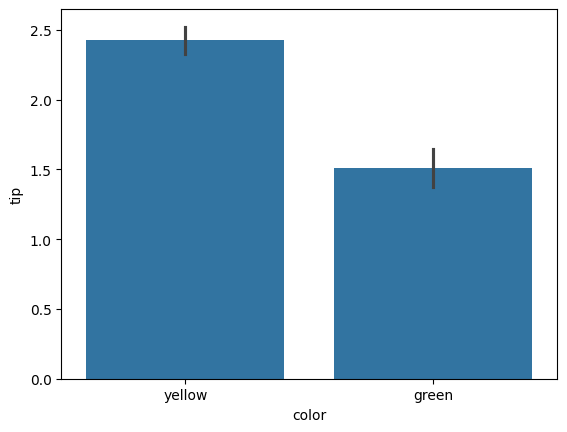

In [36]:
#graphicak analysis of categorical
sns.barplot(x=df.color,y=df.tip,estimator='std')

In [38]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='tip', ylabel='Count'>

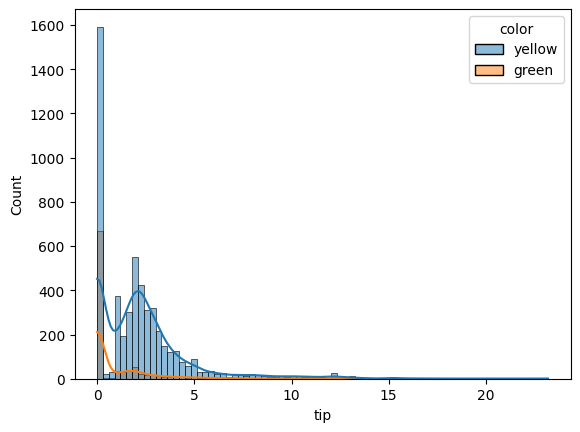

In [42]:
from os import terminal_size
sns.histplot(x=df.tip,hue=df.color,kde=True)
#

<Axes: xlabel='tip', ylabel='Count'>

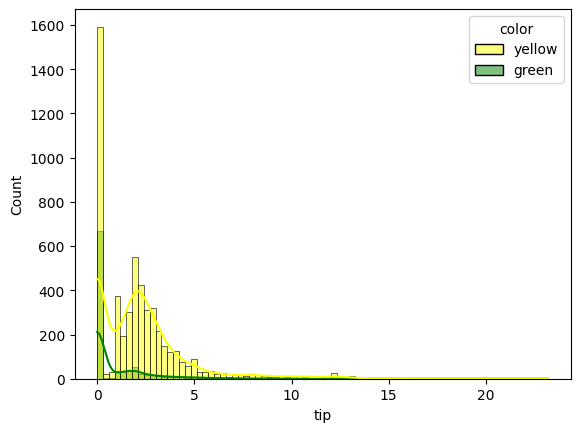

In [44]:
sns.histplot(x=df.tip,hue=df.color,kde=True,palette={'yellow':'yellow','green':'green'})

hypothesis :
h0:dISTRIBUTED OF TIP FOR YELLOW =dISTRIBUTION OF TIP GREEN
h1:dISTRIBUTED OF TIP for yellow is not to Distribution of tip for green


In [48]:

yellow_tip = df['tip'][df['color']=='yellow']
green_tip= df['tip'][df['color']=='green']

In [ ]:
# Independent T-Test
from scipy import stats
t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: The tip for yellow category is gifferent that of green")
else:
    print("Fail to reject null hypothesis: ")


In [57]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [56]:
credit_tip = df['tip'][df['payment']=='credit card']
cash_tip= df['tip'][df['payment']=='cash']
t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: The tip for credit category is gifferent that of cash")
else:
    print("Fail to reject null hypothesis: ")


Independent T-Test statistic: 47.5771244729178
P-value: 0.0
Reject null hypothesis: The tip for yellow category is gifferent that of green


<Axes: xlabel='payment', ylabel='tip'>

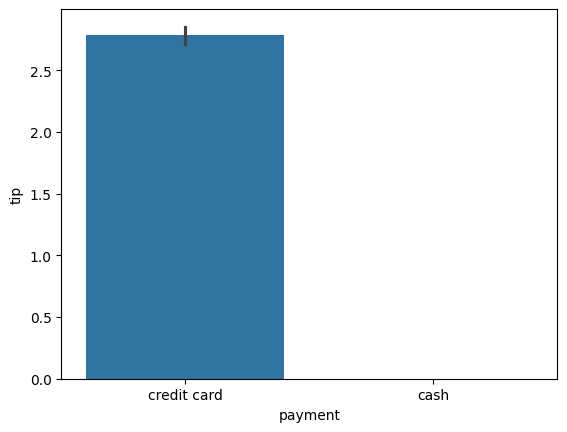

In [58]:
sns.barplot(x='payment',y='tip',data=df,estimator='mean')

In [ ]:
df['pickup_borough'].value_counts()

<Axes: xlabel='pickup_borough', ylabel='count'>

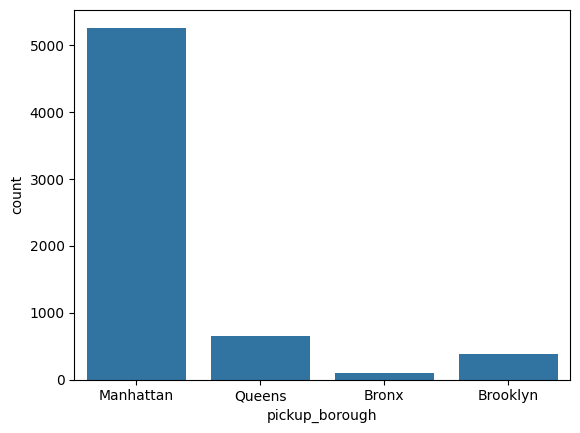

In [69]:
sns.countplot(x=df['pickup_borough'])

<Axes: xlabel='tip', ylabel='Count'>

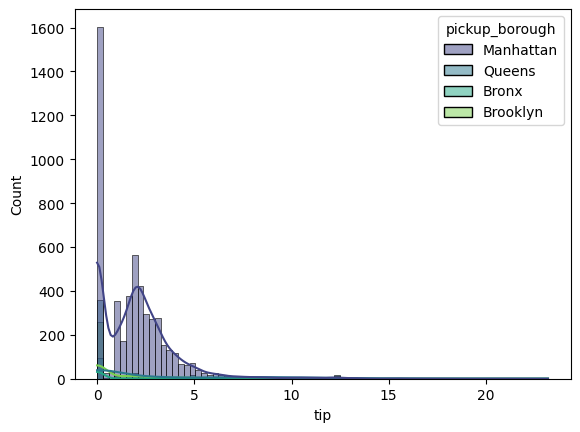

In [72]:
sns.histplot(x=df['tip'],hue=df['pickup_borough'],kde=True,palette='viridis')

In [73]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("P-value:", p_val)
alpha=0.05
if p_val<alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



P-value: 1.20915798251319e-56
Reject the null hypothesis


In [76]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# The traceback indicates a TypeError: '<' not supported between instances of 'float' and 'str'.
# This usually happens when the 'groups' variable passed to pairwise_tukeyhsd contains a mix of
# string values and float values (like np.nan).
# Although df.dropna() was called earlier, it seems the 'pickup_borough' column
# might still contain NaN values (which are floats), or other non-string types
# that are causing issues during the internal sorting process of the groups.

# To resolve this, we should ensure that the 'pickup_borough' column is free of NaN values
# before converting it to a categorical type and passing it to pairwise_tukeyhsd.
# Create a temporary DataFrame without NaNs in the 'pickup_borough' column
df_for_tukey = df.dropna(subset=['pickup_borough']).copy()

# Convert 'pickup_borough' to categorical type to ensure consistent data types
df_for_tukey['pickup_borough'] = df_for_tukey['pickup_borough'].astype('category')

# Perform Tukey HSD
tukey_results = pairwise_tukeyhsd(df_for_tukey['tip'], df_for_tukey['pickup_borough'])

# Print results
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
    Bronx  Brooklyn   0.8178 0.0106  0.139 1.4965   True
    Bronx Manhattan    1.791    0.0 1.1803 2.4017   True
    Bronx    Queens   2.8915    0.0 2.2424 3.5405   True
 Brooklyn Manhattan   0.9732    0.0 0.6546 1.2918   True
 Brooklyn    Queens   2.0737    0.0 1.6867 2.4607   True
Manhattan    Queens   1.1005    0.0 0.8514 1.3496   True
--------------------------------------------------------


In [ ]:
sns.countplot(x=df['dropoff_borough'])
sns.histplot(x=df['tip'],hue=df['dropoff_borough'],kde=True,palette='viridis')

In [82]:
manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
stalen_tip=df['tip'][df['dropoff_borough']=='Staten Island']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("P-value:", p_val)
alpha=0.05
if p_val<alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



P-value: 7.184244621592964e-15
Reject the null hypothesis


<Axes: xlabel='tip', ylabel='Count'>

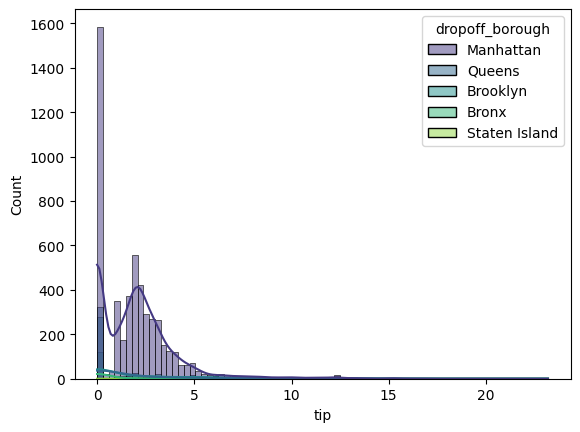

In [83]:
sns.histplot(x=df['tip'],hue=df['dropoff_borough'],kde=True,palette='viridis')

In [ ]:
import pandas as pd
df['dropoff_zone'].unique().count()

<Axes: xlabel='payment', ylabel='fare'>

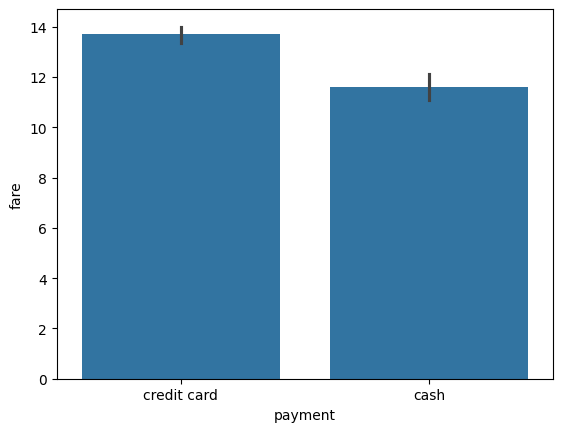

In [94]:
sns.barplot(x='payment',y='fare',data=df)

<Axes: xlabel='fare', ylabel='Count'>

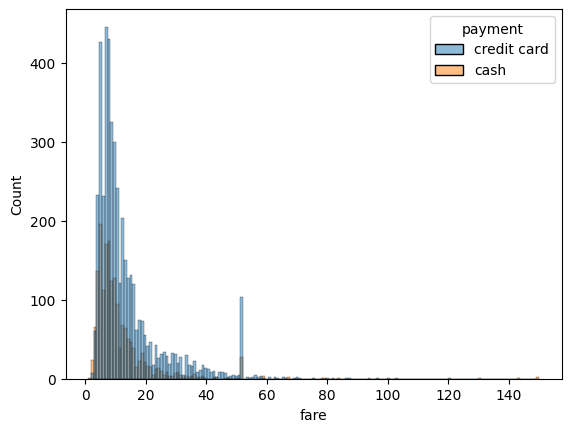

In [97]:
sns.histplot(x='fare',hue='payment',data=df)

<Axes: >

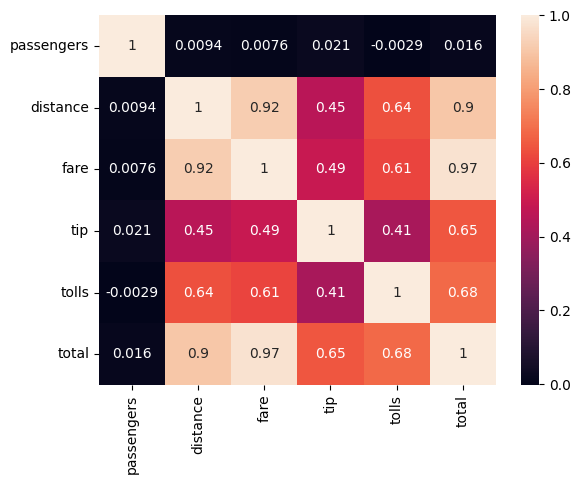

In [99]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True  )

In [100]:
sns.barplot(x='passenger',y='fare',data=df)

ValueError: Could not interpret value `passenger` for `x`. An entry with this name does not appear in `data`.